## Natural Language Processing with 2020 Democratic Debate Transcripts

### Introduction

2020 Democratic Primaries sceneing some of the most contentious debates. The main objects of this project is to investigate the differences between candidates. To bright the light to the speeches of candidates. What is it that they are talking about? Are they positive or negative, subjective or objective? We've been begin with Data Cleaning and Preparation. It is time for Exploratory Data Analysis.

The dataset has been downloaded from Kaggle [Democratic Debate Transcripts 2020.](https://www.kaggle.com/brandenciranni/democratic-debate-transcripts-2020)

### Exploratory Data Analysis

This notebook contains the process of Exploratory Data Analysis for NLP process which includes;

- Reading the previously pickled DTMs and Corpuses.
- Finding the top used words for every candidate.
- Evaluating the size of vocabulary for every candidate.
- Visualization

In [1]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from wordcloud import WordCloud
import pickle

In [2]:
data = pd.read_pickle('data_lemma_dtm.pkl')
data = data.transpose()
data

speaker,Bernie Sanders,Andrew Yang,Joe Biden,Amy Klobuchar,Pete Buttigieg,Elizabeth Warren,Tom Steyer,Michael Bloomberg,Tulsi Gabbard
aa,0,0,0,1,0,0,0,0,0
aapi,0,0,0,0,0,0,1,0,0
abandon,0,0,0,0,1,0,1,0,0
abate,0,0,1,0,0,0,0,0,0
abc,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
zealand,0,0,0,0,1,0,0,0,0
zero,3,11,3,0,5,7,0,1,0
zip,1,1,1,0,0,0,0,0,0
zone,0,0,3,0,2,0,0,0,0


In [3]:
def top_words(data, number):
    top_words = {}
    for speaker in data.columns:
        top = data[speaker].sort_values(ascending=False).head(number)
        top_words[speaker] = list(zip(top.index, top.values))
    return top_words

In [4]:
top_dict = top_words(data, 50)
top_df = pd.DataFrame.from_dict(top_dict)
top_df.head()

,Bernie Sanders,Andrew Yang,Joe Biden,Amy Klobuchar,Pete Buttigieg,Elizabeth Warren,Tom Steyer,Michael Bloomberg,Tulsi Gabbard
0,"(people, 253)","(american, 71)","(make, 195)","(think, 182)","(president, 141)","(people, 222)","(people, 95)","(just, 34)","(people, 53)"
1,"(country, 154)","(people, 53)","(say, 191)","(people, 166)","(make, 114)","(need, 170)","(american, 76)","(people, 31)","(war, 47)"
2,"(american, 109)","(country, 53)","(fact, 189)","(say, 154)","(people, 113)","(make, 154)","(say, 57)","(city, 30)","(country, 43)"
3,"(say, 101)","(say, 45)","(people, 154)","(make, 138)","(american, 112)","(want, 132)","(thats, 52)","(think, 28)","(american, 34)"
4,"(year, 100)","(know, 39)","(thats, 145)","(president, 122)","(just, 109)","(work, 125)","(im, 49)","(new, 27)","(serve, 31)"


- Pickled files have been read.
- A dataframe contains top 50 words for all the candidates have been created.

In [5]:
def find_common(data, top_dict):
    words = []
    for speaker in data.columns:
        top = [word for (word, count) in top_dict[speaker]]
        for t in top:
            words.append(t)
    Counter(words).most_common()
    add_stop_words = [word for word, count in Counter(words).most_common() if count > 3]
    return add_stop_words

In [6]:
def create_dtm(data_lemma, stop_words):
    cv = CountVectorizer(stop_words=stop_words)
    data_cv = cv.fit_transform(data_lemma.speech)
    dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
    dtm.index = data_lemma.index
    dtm = dtm.transpose()
    pickle.dump(cv, open("cv.pkl", "wb"))
    return dtm

In [7]:
def remove_common(data_lemma, add_stop_words):
    stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
    add_stop_words = ['ive', 'iam', 'youre', 'youve', 'weve', 'hes', 'shes', 'its', 'theyre', 'theyve']
    stop_words = stop_words.union(add_stop_words)
    dtm_unique = create_dtm(data_lemma, stop_words)
    return dtm_unique, stop_words

In [8]:
data_lemma = pd.read_pickle("corpus_lemma.pkl")
data_lemma = data_lemma.set_index("speaker")
add_stop_words = find_common(data, top_dict)
remove_common_tuple = remove_common(data_lemma, add_stop_words)
dtm_unique = remove_common_tuple[0]
stop_words = remove_common_tuple[1]
dtm_unique.to_pickle('dtm_unique.pkl')
pickle.dump(stop_words, open("stop_words.pkl", "wb"))

- Most common words have been detected to find the unique top words for all candidates.
- A new DTM have been created which does not containing most common words.

In [9]:
top_dict_unique = top_words(dtm_unique, 50)
top_df_unique = pd.DataFrame.from_dict(top_dict_unique)
top_df_unique.head()

,Bernie Sanders,Andrew Yang,Joe Biden,Amy Klobuchar,Pete Buttigieg,Elizabeth Warren,Tom Steyer,Michael Bloomberg,Tulsi Gabbard
0,"(healthcare, 91)","(problem, 28)","(fact, 189)","(bring, 68)","(community, 47)","(fight, 81)","(stage, 34)","(city, 30)","(war, 47)"
1,"(tell, 60)","(family, 25)","(number, 90)","(win, 62)","(happen, 46)","(family, 70)","(climate, 33)","(new, 27)","(serve, 31)"
2,"(company, 54)","(economy, 23)","(able, 88)","(vote, 47)","(washington, 45)","(help, 55)","(corporation, 32)","(york, 23)","(end, 18)"
3,"(industry, 52)","(fact, 22)","(deal, 82)","(lead, 40)","(war, 37)","(build, 54)","(beat, 31)","(problem, 12)","(bring, 17)"
4,"(believe, 50)","(community, 21)","(united, 59)","(pass, 37)","(issue, 36)","(healthcare, 54)","(world, 30)","(try, 11)","(regime, 17)"


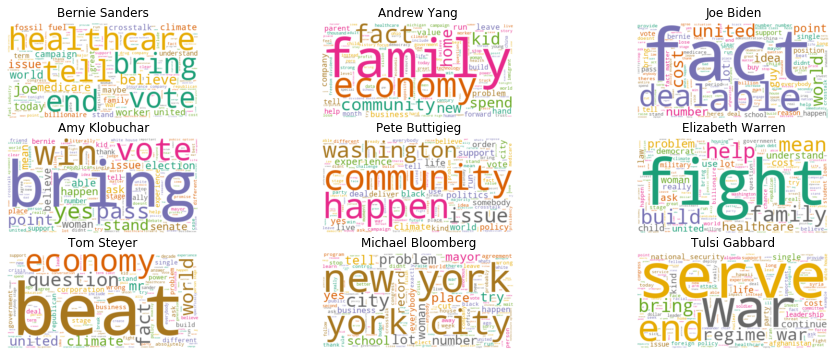

In [10]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Bernie Sanders', 'Andrew Yang', 'Joe Biden', 'Amy Klobuchar', 
              'Pete Buttigieg', 'Elizabeth Warren', 'Tom Steyer', 'Michael Bloomberg', 'Tulsi Gabbard']

for index, speaker in enumerate(data.columns):
    wc.generate(data_lemma.speech[speaker])
    
    plt.subplot(3, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

- Wordclouds have been created for every candidate with their unique top words.

In [11]:
vocabulary = pd.read_pickle('vocabulary.pkl')
vocabulary = vocabulary.sort_values(by='vocabulary', ascending=False)

In [12]:
vocabulary

,speaker,vocabulary
4,Pete Buttigieg,2991
2,Joe Biden,2755
3,Amy Klobuchar,2564
5,Elizabeth Warren,2469
0,Bernie Sanders,2305
1,Andrew Yang,1764
6,Tom Steyer,1474
8,Tulsi Gabbard,1291
7,Michael Bloomberg,1009


- The sizes of every candidates vocabulary have been evaluated.

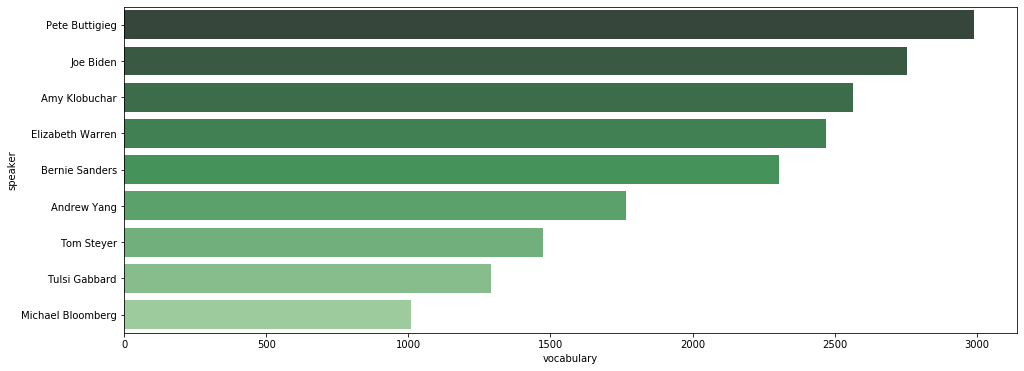

In [13]:
sns.barplot(x="vocabulary", y="speaker", data=vocabulary, palette="Greens_d")

### Results for Exploratory Data Anaylsis

1. **Wordcloud Analysis**

**Bernie Sanders:** A progressive, democratic socialist candidate who is mostly speaking about **healtcare** system and **bring**ing people together. At the background he touches on **climate** change, the hard life of **workers** and billionares who are his number one rivals.


**Andrew Yang:** A young and progressive candidate who cares about **facts** and math. Mostly focusing on **economy**. Also, he is speaking so much about **family** or families which is a politically neutral area.


**Joe Biden:** A moderate former vice-president who is soppurted by Democratic Party Establishment. He is mostly talking about **facts**, his **abilities** wants people to understand that he can **deal** with Donal Trump.


**Amy Klobuchar:** A moderate senator who offers small, careful yet effective changes in system. She is mostly speaking about **bring**ing people together, how to **win** the presidency. And she mentions her effort in Senate to **pass** important bills.


**Pete Buttigieg:** The youngest candidate in the race who is a former-soldier mayor and defending moderate ideas. The most used words of him is **community** which he uses much while he is speaking about the city that under his administration. Also he says **Washington** because he is a candidate from outside the Washington and he wants to use it to establish intimacy between him and voters.


**Elizabeth Warren:** A progressive Senator who known by her characteristic of being a tireless **fight**er. In the background, she is speaking mostly about **families**, **healthcare**, **build**ing a movement.


**Tom Steyer:** A businessman who is highly concerned about minorities. He is mostly talking about the **economy** and **beat**ing Donald Trump.


**Micheal Bloomberg:** A moderate businessman and former-mayor of **New York**. He participated the race so late and at the limited debate he has been participated, he was mostly talked about his past achivements in **New York** and mostly had to defend himself from attacks of progressive candidates since he is a billionare and there are accusations of harassment from his **woman** workers.


**Tulsi Gabbard:** A young progressive who could participate limited amount of debates at the beginning of primaries. She has mostly talked about **serving** in the army, **war**s.
    
    
2. **Sizes of Vocabulary**

The youngest candidate in the race, Pete Buttigieg, uses the highest size of vocabulary follwed by Joe Biden and Amy Klobuchar. Since they participated limited amount of debates, it is understandable the Tom Steyer, Tulsi Gabbard and Michael Bloomberg's low vocabulary sizes.

*__Let's proceed to Sentiment Analysis!__*